# import essentials

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing,metrics 

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

## Load Data

In [3]:
train_data=pd.read_csv("train_s3TEQDk.csv")
test_data=pd.read_csv("test_mSzZ8RL.csv")
sample_data=pd.read_csv("sample_submission_eyYijxG.csv")

In [4]:
train_data.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [5]:
train_data.groupby("Is_Lead").count()

## Data imbalance in our training data 

ID  Gender     Age  Region_Code  Occupation  Channel_Code  \
Is_Lead                                                                  
0        187437  187437  187437       187437      187437        187437   
1         58288   58288   58288        58288       58288         58288   

         Vintage  Credit_Product  Avg_Account_Balance  Is_Active  
Is_Lead                                                           
0         187437          183087               187437     187437  
1          58288           33313                58288      58288

# Describe the Data

In [6]:
train_data.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

# info

In [7]:
#observe the different feature type present in the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# Categorical Feature Encoding

## Categorical cols Distribution

In [8]:
train_data.drop(["ID"],axis=1,inplace=True) # Dropping the Id column
features=train_data.columns.values
categorical_features=train_data.select_dtypes(include="object").columns.tolist() # list of only categorical features
numerical_features=train_data.select_dtypes(include=np.number).columns.tolist() # List of only numerical features 
print("categorical features Columns",categorical_features)
print("numerical Features Columns",numerical_features)

categorical features Columns ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
numerical Features Columns ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


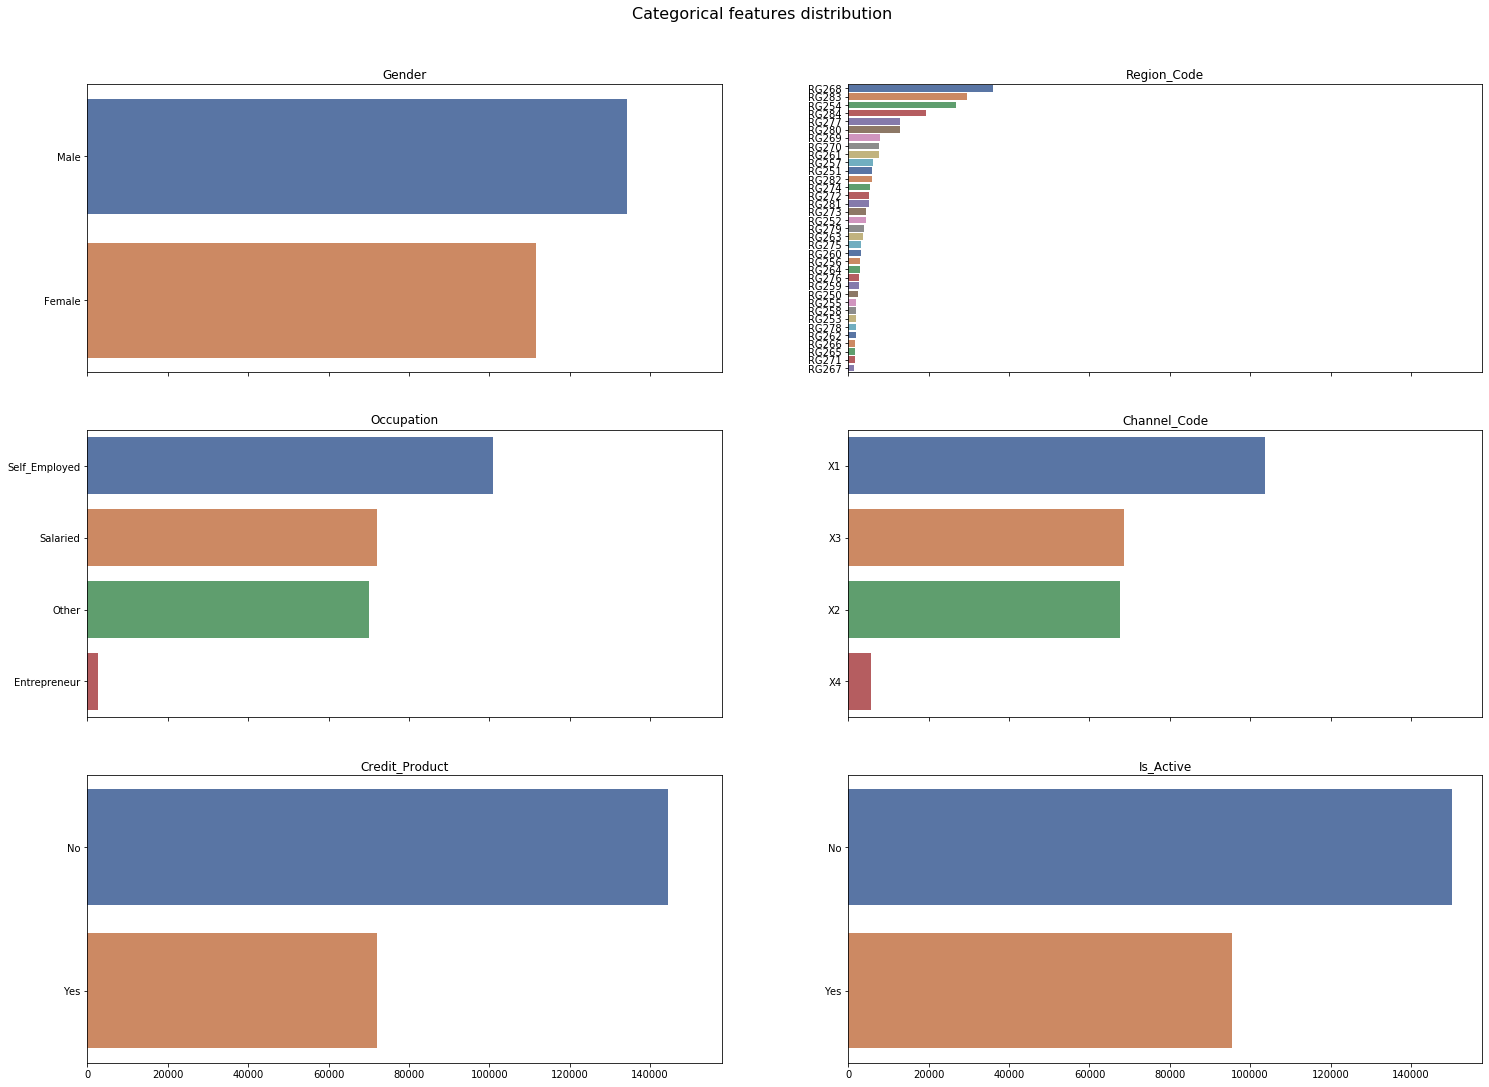

In [9]:
### Categorical features distribution
idx=0
f,axes=plt.subplots(3,2,sharex=True,figsize=(25,18))
plt.suptitle('Categorical features distribution', size=16, y=(0.94))

for row in range(3):
    for col in range(2):
        data=train_data[categorical_features[idx]].value_counts()
        sns.barplot(x=data.values,y=data.index,palette="deep",ax=axes[row,col])
        axes[row,col].set_title(categorical_features[idx])
        idx+=1

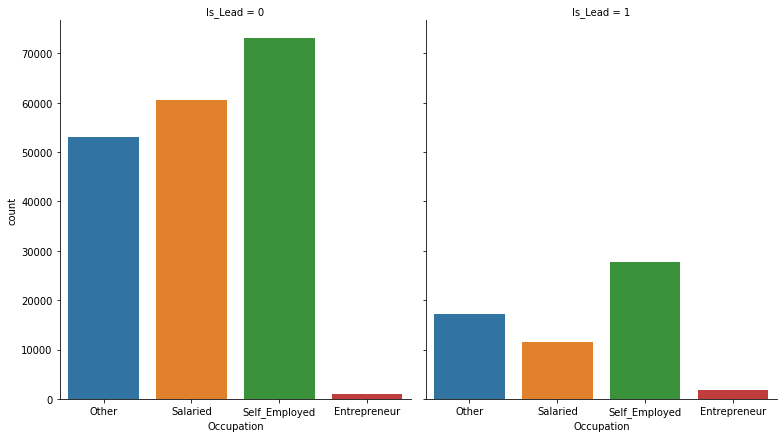

In [10]:
sns.catplot(x="Occupation",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

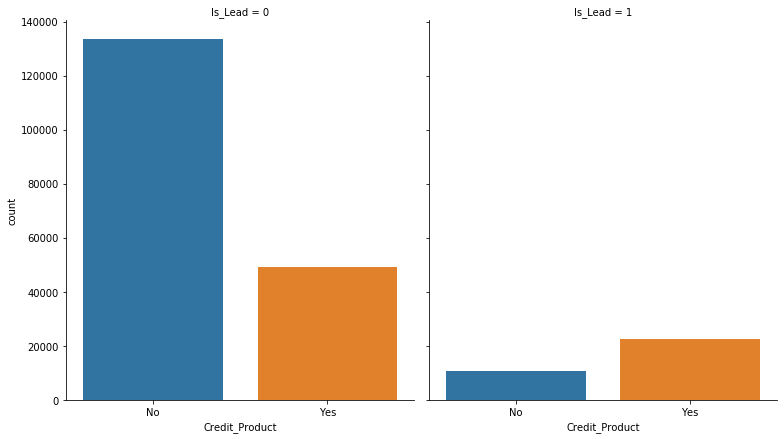

In [11]:
sns.catplot(x="Credit_Product",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

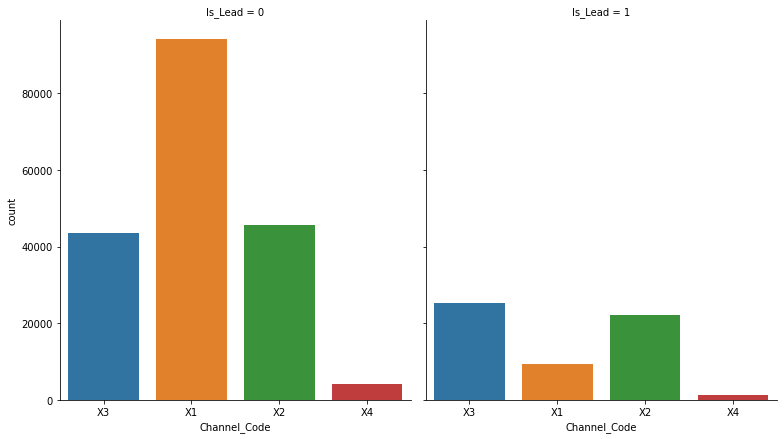

In [12]:
sns.catplot(x="Channel_Code",col='Is_Lead',
           data=train_data,kind='count',
           height=6,aspect=.9);

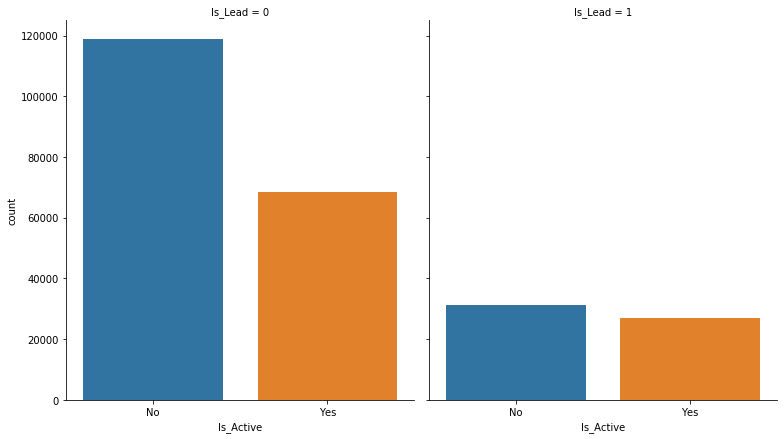

In [13]:
sns.catplot(x="Is_Active", col="Is_Lead",
                data=train_data, kind="count",
                height=6, aspect=.9);

## Encoding Cat features

In [14]:
train_data["Region_Code"].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [15]:
#Data Encoding
train_data["Gender"]=train_data["Gender"].replace({"Female":0,"Male":1})
train_data["Occupation"]=train_data["Occupation"].replace({"Self_Employed":1,"Salaried":2,"Other":3,"Entrepreneur":4})
train_data["Channel_Code"]=train_data["Channel_Code"].replace({'X1':'1','X2':'2','X3':'3','X4':'4'})
train_data["Credit_Product"]       = train_data["Credit_Product"].replace({'No':'1','Yes':'2'})
train_data["Is_Active"]            = train_data["Is_Active"].replace({'No':'1','Yes':'2'})
train_data["Region_Code"]          = train_data["Region_Code"].apply(lambda x:x[2:])

In [16]:
train_data["Region_Code"]      =pd.to_numeric(train_data["Region_Code"])
train_data["Channel_Code"]     = pd.to_numeric(train_data["Channel_Code"])
train_data["Credit_Product"]   = pd.to_numeric(train_data["Credit_Product"])
train_data["Is_Active"]        = pd.to_numeric(train_data["Is_Active"])

# EDA (Exploratory Data Analysis)

## Numericals Columns Distribution


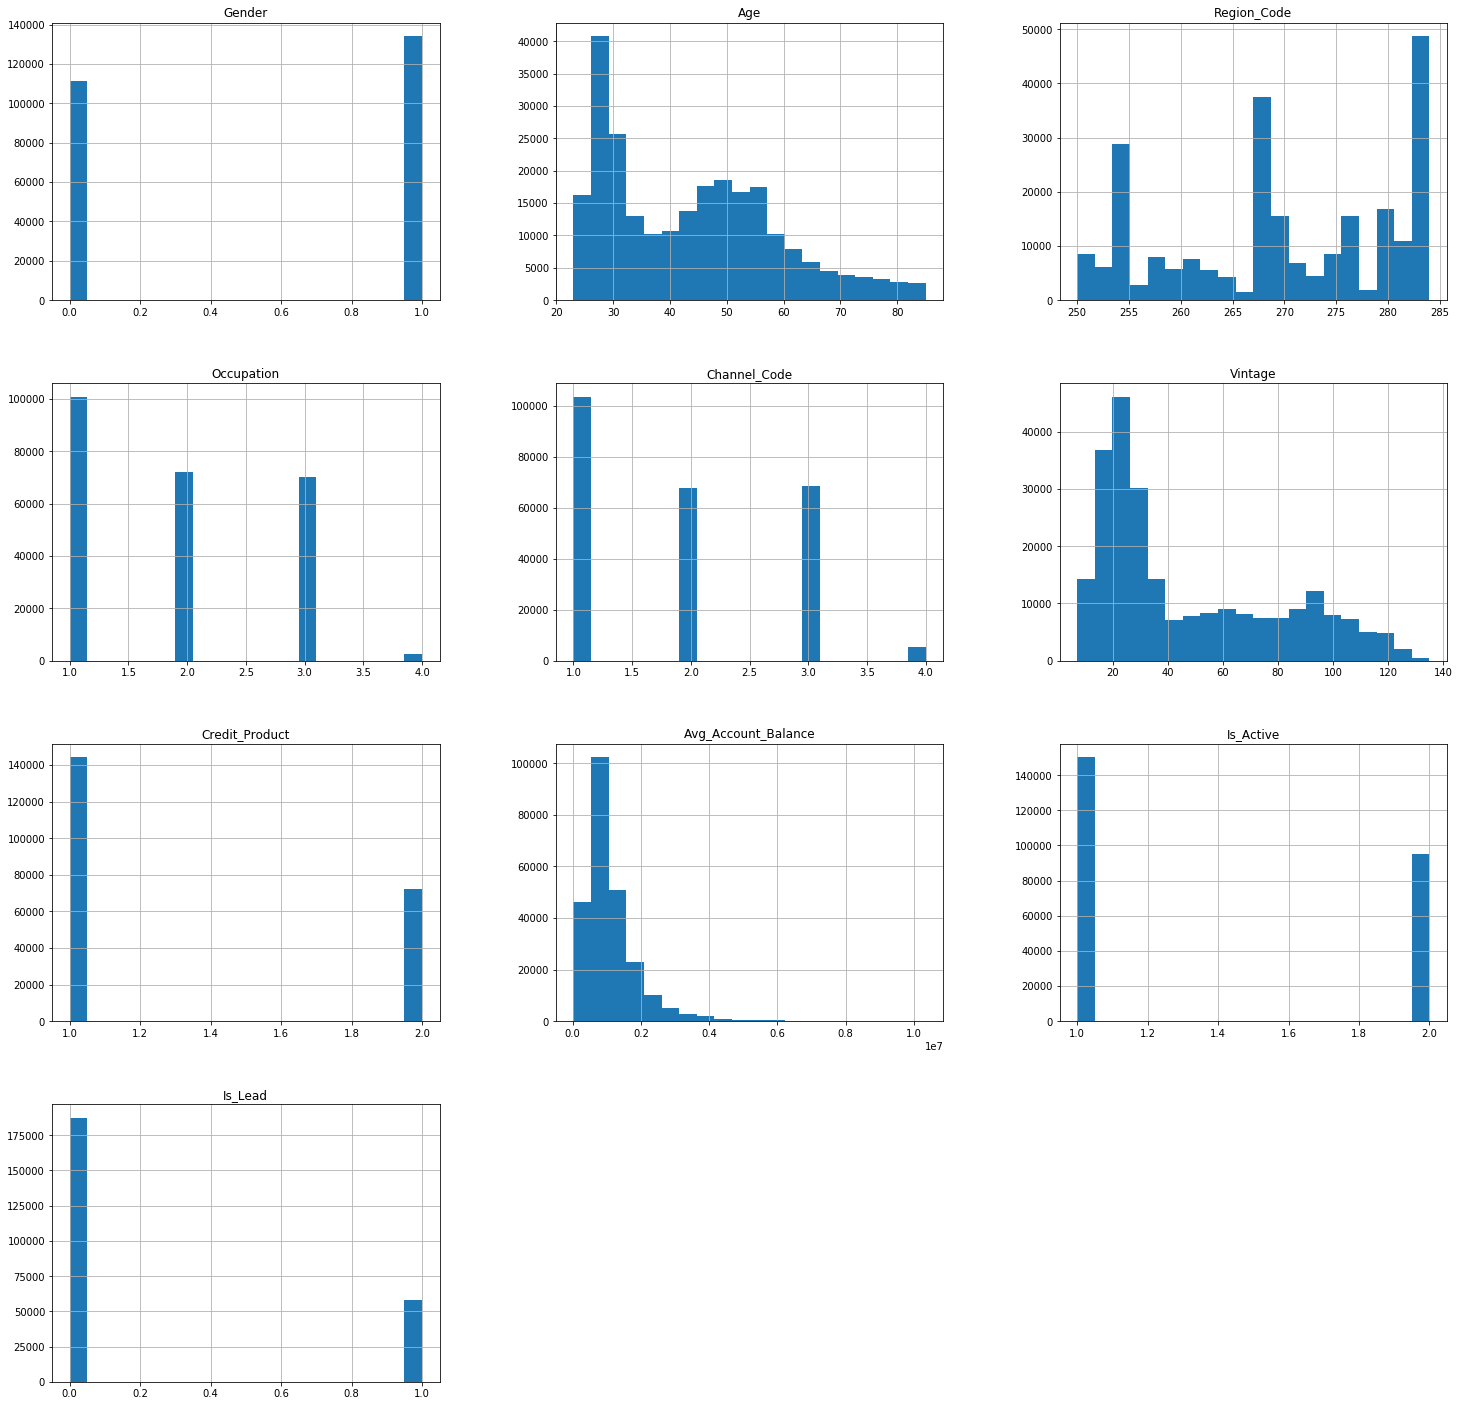

In [17]:
train_data.hist(bins=20,figsize=(25,25))
plt.show()

## Scatter Plot

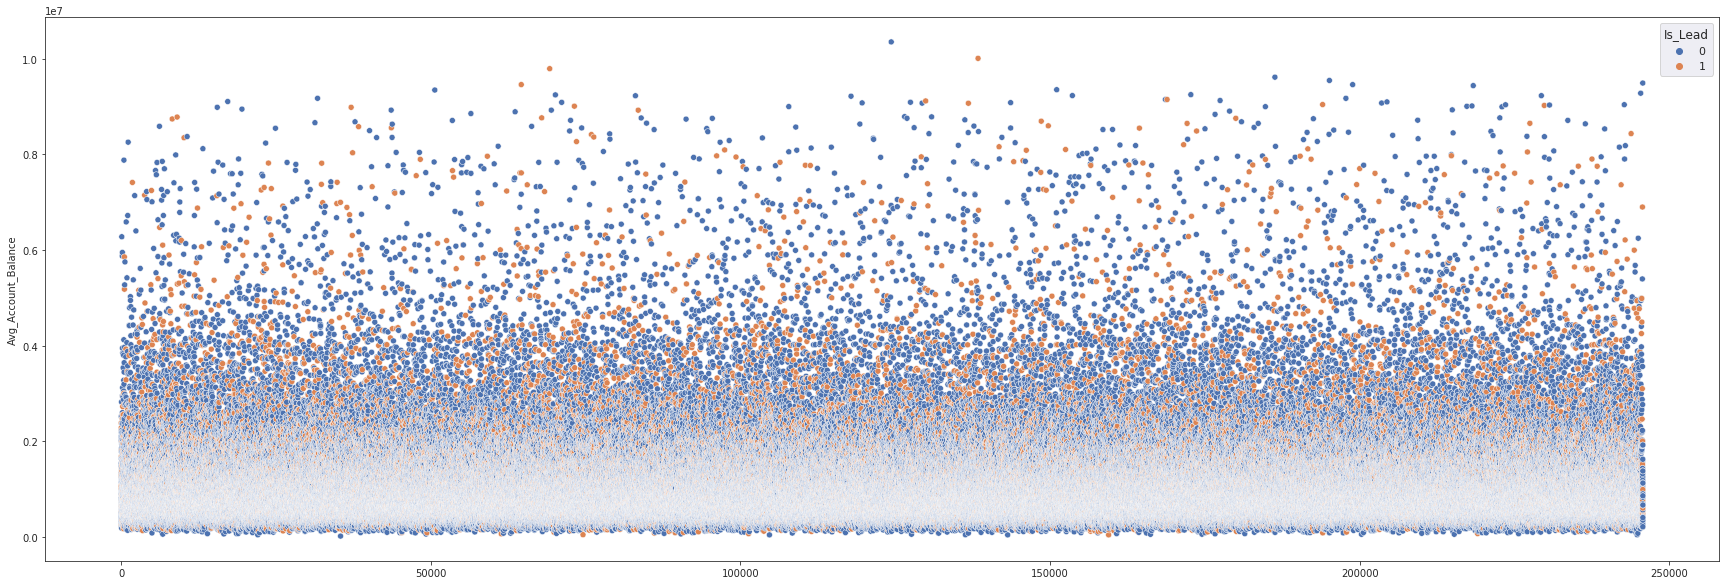

In [18]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["Avg_Account_Balance"],hue=train_data['Is_Lead']);

In [19]:
# bivariate analysis by plotting pair plot
# pair-plot
# plt.close()
# sns.set_style("whitegrid")
# sns.pairplot(train_data, hue="Is_Lead", height=3)
# plt.show()

## Plotting Distribution of all the features

<Figure size 432x288 with 0 Axes>

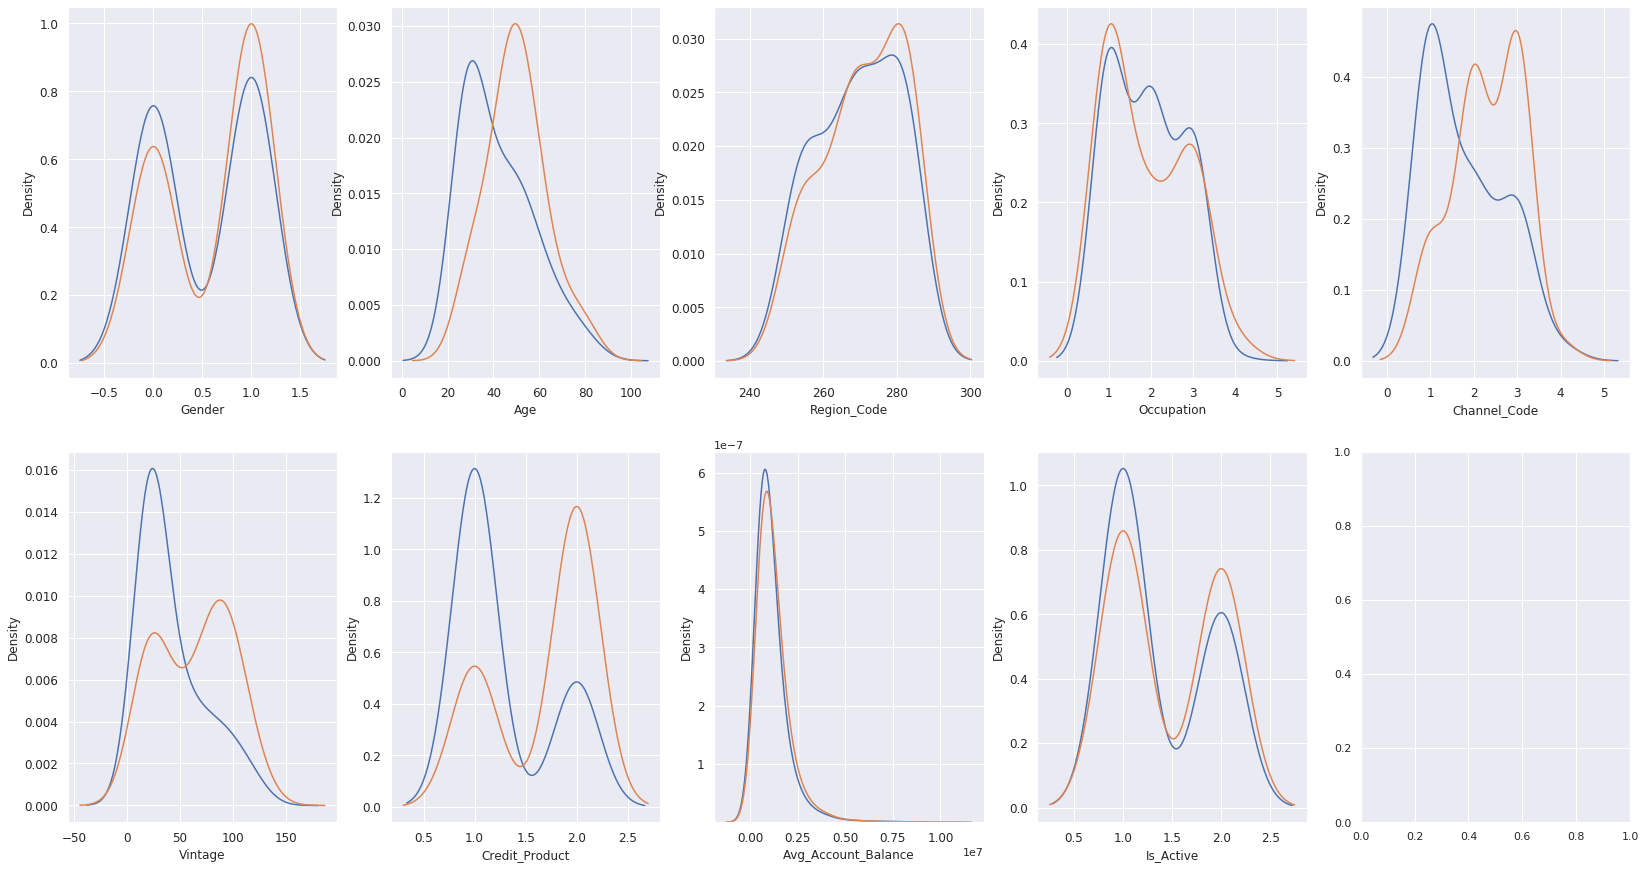

In [20]:
#Plotting the distributions of all the featuers

# Plotting numerical variable in displot to visualise the distribution
train_num=train_data.select_dtypes(include="number")
var=list(train_num.columns.values)
# dropping Class columns from the list
var.remove("Is_Lead")
i=0
t0=train_data.loc[train_data["Is_Lead"]==0]
t1=train_data.loc[train_data["Is_Lead"]==1]
plt.figure()
fig, ax = plt.subplots(2,5,figsize=(28,15))
for feature in var:
    i+=1

    plt.subplot(2,5,i)
    sns.kdeplot(t0[feature],bw=0.5,label=0)
    sns.kdeplot(t1[feature],bw=0.5,label=1)
    plt.xlabel(feature,fontsize=12)
    locs,labels=plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


### Avg_Account_Balance is Highly Overlapping so it is better to remove

In [21]:
# train_data.drop(["Avg_Account_Balance"],axis=1,inplace=True)#dropping Avg_Account_Balance col

# Handling missing Values

In [22]:
# Checking for the missing value present in each columns
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=["Total","percent"]).transpose()

Credit_Product  Gender  Age  Region_Code  Occupation  Channel_Code  \
Total      29325.000000     0.0  0.0          0.0         0.0           0.0   
percent       11.934073     0.0  0.0          0.0         0.0           0.0   

         Vintage  Avg_Account_Balance  Is_Active  Is_Lead  
Total        0.0                  0.0        0.0      0.0  
percent      0.0                  0.0        0.0      0.0

In [23]:
train_data.groupby("Credit_Product").count()

Gender     Age  Region_Code  Occupation  Channel_Code  \
Credit_Product                                                          
1.0             144357  144357       144357      144357        144357   
2.0              72043   72043        72043       72043         72043   

                Vintage  Avg_Account_Balance  Is_Active  Is_Lead  
Credit_Product                                                    
1.0              144357               144357     144357   144357  
2.0               72043                72043      72043    72043

In [24]:
#imputing Credit_Product Nan values with the new value 3
train_data["Credit_Product"]=train_data["Credit_Product"].fillna(3)
# again Checking for the missing value present in each columns
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=["Total","percent"]).transpose()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
Total       0.0  0.0          0.0         0.0           0.0      0.0   
percent     0.0  0.0          0.0         0.0           0.0      0.0   

         Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  
Total               0.0                  0.0        0.0      0.0  
percent             0.0                  0.0        0.0      0.0

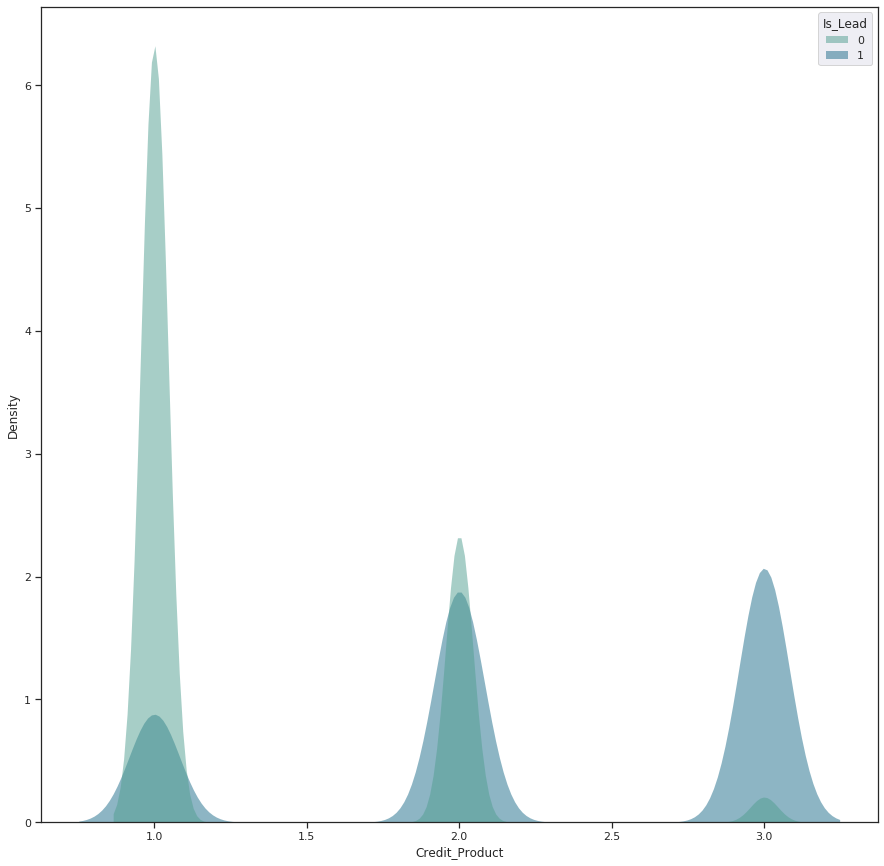

In [25]:
# Plot
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(15,15)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train_data,
           x="Credit_Product",
           hue="Is_Lead",
           fill=True,
           common_norm=False,
           palette="crest",
           alpha=.5,
           linewidth=0);

# Feature Engineering

In [26]:
train=train_data.copy()
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  
0             1.0              1045696          1        0  
1             1.0               581988          1        0  
2             1.0              1484315          2        0  
3             1.0               470454          1        0  
4             1.0               886787          1        0

## Binning on age

In [27]:
train.loc[train["Age"].idxmax()]

Gender                      1.0
Age                        85.0
Region_Code               282.0
Occupation                  3.0
Channel_Code                3.0
Vintage                   115.0
Credit_Product              2.0
Avg_Account_Balance    891513.0
Is_Active                   1.0
Is_Lead                     0.0
Name: 411, dtype: float64

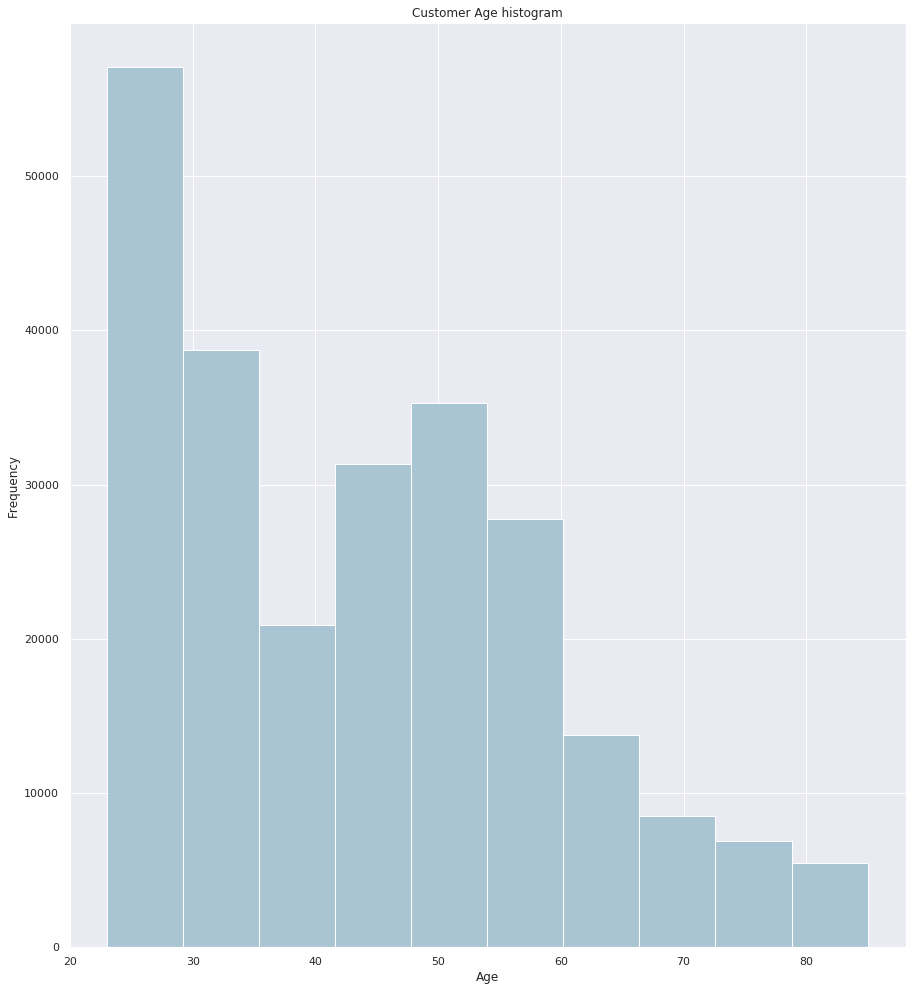

In [28]:
fig,ax=plt.subplots(figsize=(15,17))
train["Age"].hist(color='#A9C5D3')
ax.set_title("Customer Age histogram")
ax.set_xlabel("Age",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12);

Age bins range

23 -  29  : 2

30 - 39  : 3

40 - 49  : 4

50 - 59  : 5

60 - 69  : 6

70 - 579  : 7

80 - 85  : 8

In [29]:
train["Age_bins"]=np.array(np.floor(np.array(train["Age"])/10.))
train.iloc[20:25]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
20       1   44          269           1             2       19   
21       1   27          257           2             1       21   
22       0   32          279           2             1       26   
23       1   50          280           1             3       99   
24       0   31          282           2             1       33   

    Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  
20             2.0              1001650          1        1       4.0  
21             1.0              1239342          1        0       2.0  
22             1.0              1339779          2        0       3.0  
23             1.0               887330          2        0       5.0  
24             1.0               396806          1        0       3.0

## Binarization on Occupation
create a column, if there is a 4 in the occupation it will put 1 corresponds to 4

In [30]:
occupation_binary=np.array(train["Occupation"])
train["Occupation_binary"]=train["Occupation"].map(lambda x:1 if x==4 else 0)
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   

   Occupation_binary  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

## Modifying vintage month to year

In [31]:
train['vintage_yr'] = np.array(np.floor(np.array(train['Vintage']) / 12.))
train.head(8)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   

   Occupation_binary  vintage_yr  
0                  0         3.0  
1                  0         2.0  
2                  0         2.0  
3                  0         1.0  
4                  0         2.0  
5                  0         2.0  
6                  0         1.0  
7                  0         1.0

## Binarization on Credit product
create a column, if there is a 3 in the Credit product it will put 1 corresponds to 3

In [32]:
train["Credit_Product_binary"]=train["Credit_Product"].map(lambda x:1 if x==3 else 0)
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   

   Occupation_binary  vintage_yr  Credit_Product_binary  
0                  0         3.0                      0  
1                  0         2.0                      0  
2                  0         2.0                      0  
3                  0         1.0                      0  
4                  0         2.0                      0

## Binning Avg_Account_Balance with inter quartile range

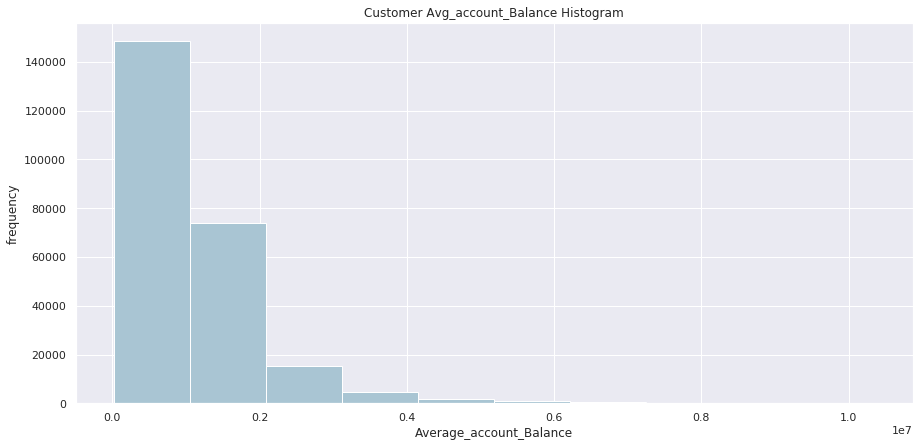

In [33]:
fig,ax=plt.subplots(figsize=(15,7))
train["Avg_Account_Balance"].hist(color="#A9C5D3")
ax.set_title("Customer Avg_account_Balance Histogram",fontsize=12)
ax.set_xlabel("Average_account_Balance",fontsize=12)
ax.set_ylabel("frequency",fontsize=12);

In [34]:
quantiles_range=[0,.25,.5,.75,1.]
quantiles=train["Avg_Account_Balance"].quantile(quantiles_range)
print(quantiles)

0.00       20790.0
0.25      604310.0
0.50      894601.0
0.75     1366666.0
1.00    10352009.0
Name: Avg_Account_Balance, dtype: float64


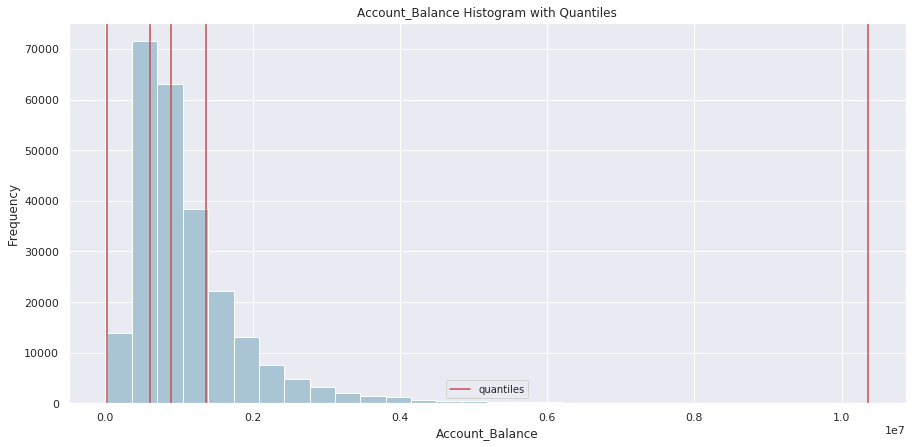

In [35]:
fig,ax=plt.subplots(figsize=(15,7))
train["Avg_Account_Balance"].hist(bins=30,color="#A9C5D3")
for quantile in quantiles:
    qvl=plt.axvline(quantile,color='r')
ax.legend([qvl],['quantiles'],fontsize=10)

ax.set_title('Account_Balance Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Account_Balance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

In [36]:
quantile_labels=["25","50","75","100"]
train["Avg_account_Balance_quantile"]=pd.qcut(train["Avg_Account_Balance"],q=quantiles_range,labels=quantile_labels)
train.iloc[4:9]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   
8             1.0              1274284          1        0       4.0   

   Occupation_binary  vintage_yr  Credit_Product_binary  \
4                  0         2.0                      0   
5                  0         2.0                      0   
6                  0         1.0                      1   
7                  0         1.0                      0   
8                  0         3.0                      0   

  Avg_account_Balance_quantile  
4                           50  
5                           25  
6                           75  
7                           25  
8                           75

## log transformation on Avg_Account_Balance with inter quartile range

In [37]:
train["Avg_account_Balance_log"]=np.log(1+train["Avg_Account_Balance"])
train.iloc[4:9]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   
8             1.0              1274284          1        0       4.0   

   Occupation_binary  vintage_yr  Credit_Product_binary  \
4                  0         2.0                      0   
5                  0         2.0                      0   
6                  0         1.0                      1   
7                  0         1.0                      0   
8                  0         3.0                      0   

  Avg_account_Balance_quantile  Avg_account_Balance_log  
4                           50                13.695361  
5                           25                13.207006  
6                           75                13.870710  
7                           25                13.005211  
8                           75                14.057896

In [38]:
train["Avg_account_Balance_quantile"]=pd.to_numeric(train["Avg_account_Balance_quantile"])

## Create another column where convert the balance of last 12 months(1yr) balance into 1 month

In [39]:
train["Avg_Account_Balance_monthly"]=np.array(np.floor(np.array(train["Avg_Account_Balance"])/12.))
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   

   Occupation_binary  vintage_yr  Credit_Product_binary  \
0                  0         3.0                      0   
1                  0         2.0                      0   
2                  0         2.0                      0   
3                  0         1.0                      0   
4                  0         2.0                      0   

   Avg_account_Balance_quantile  Avg_account_Balance_log  \
0                            75                13.860194   
1                            25                13.274207   
2                           100                14.210465   
3                            25                13.061456   
4                            50                13.695361   

   Avg_Account_Balance_monthly  
0                      87141.0  
1                      48499.0  
2                     123692.0  
3                      39204.0  
4                      73898.0

## if Is_Active = 2(yes) which means customer is active in last three months. I'll put 1 corresponds to 2(yes) 

In [40]:
is_active=np.array(train["Is_Active"])
train["is_Active_3(yes)"]=train["Is_Active"].map(lambda x : 1 if x==2 else 0)
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   

   Occupation_binary  vintage_yr  Credit_Product_binary  \
0                  0         3.0                      0   
1                  0         2.0                      0   
2                  0         2.0                      0   
3                  0         1.0                      0   
4                  0         2.0                      0   

   Avg_account_Balance_quantile  Avg_account_Balance_log  \
0                            75                13.860194   
1                            25                13.274207   
2                           100                14.210465   
3                            25                13.061456   
4                            50                13.695361   

   Avg_Account_Balance_monthly  is_Active_3(yes)  
0                      87141.0                 0  
1                      48499.0                 0  
2                     123692.0                 1  
3                      39204.0                 0  
4                      73898.0                 0

## Create columns that has product of weak features
5 weak features


1.   Age
2.   Vintage
3.   region code
4.   Avg_Account_Balance_quantile
5.   Avg_Account_Balance_log



It will create three more feature





In [41]:
train['combination1']   = train['Age']  * train['Vintage']
train['combination2']   = train['Vintage']  * train['Region_Code'] 
train['combination3']   = train['Region_Code'] * train['Age']
train['combination4']   = train['Age']  * train['Vintage'] * train['Region_Code']
train['combination5']   = train['Vintage']  * train['Region_Code'] * train['Avg_account_Balance_quantile'] 
train['combination6']   = train['Avg_account_Balance_quantile'] * train['Age']  * train['Avg_account_Balance_log']
train

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0            0   73          268           3             3       43   
1            0   30          277           2             1       32   
2            0   56          268           1             3       26   
3            1   34          270           2             1       19   
4            0   30          282           2             1       33   
...        ...  ...          ...         ...           ...      ...   
245720       1   51          284           1             3      109   
245721       1   27          268           2             1       15   
245722       0   26          281           2             1       13   
245723       0   28          273           2             1       31   
245724       1   29          269           2             1       21   

        Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  ...  \
0                  1.0              1045696          1        0  ...   
1                  1.0               581988          1        0  ...   
2                  1.0              1484315          2        0  ...   
3                  1.0               470454          1        0  ...   
4                  1.0               886787          1        0  ...   
...                ...                  ...        ...      ...  ...   
245720             3.0              1925586          1        0  ...   
245721             1.0               862952          2        0  ...   
245722             1.0               670659          1        0  ...   
245723             1.0               407504          1        0  ...   
245724             1.0              1129276          1        0  ...   

        Avg_account_Balance_quantile  Avg_account_Balance_log  \
0                                 75                13.860194   
1                                 25                13.274207   
2                                100                14.210465   
3                                 25                13.061456   
4                                 50                13.695361   
...                              ...                      ...   
245720                           100                14.470741   
245721                            50                13.668116   
245722                            50                13.416018   
245723                            25                12.917808   
245724                            75                13.937088   

        Avg_Account_Balance_monthly  is_Active_3(yes)  combination1  \
0                           87141.0                 0          3139   
1                           48499.0                 0           960   
2                          123692.0                 1          1456   
3                           39204.0                 0           646   
4                           73898.0                 0           990   
...                             ...               ...           ...   
245720                     160465.0                 0          5559   
245721                      71912.0                 1           405   
245722                      55888.0                 0           338   
245723                      33958.0                 0           868   
245724                      94106.0                 0           609   

        combination2  combination3  combination4  combination5  combination6  
0              11524         19564        841252        864300  75884.563282  
1               8864          8310        265920        221600   9955.655120  
2               6968         15008        390208        696800  79578.601861  
3               5130          9180        174420        128250  11102.237252  
4               9306          8460        279180        465300  20543.041837  
...              ...           ...           ...           ...           ...  
245720         30956         14484       1578756       3095600  73800.781213  
245721          4020    

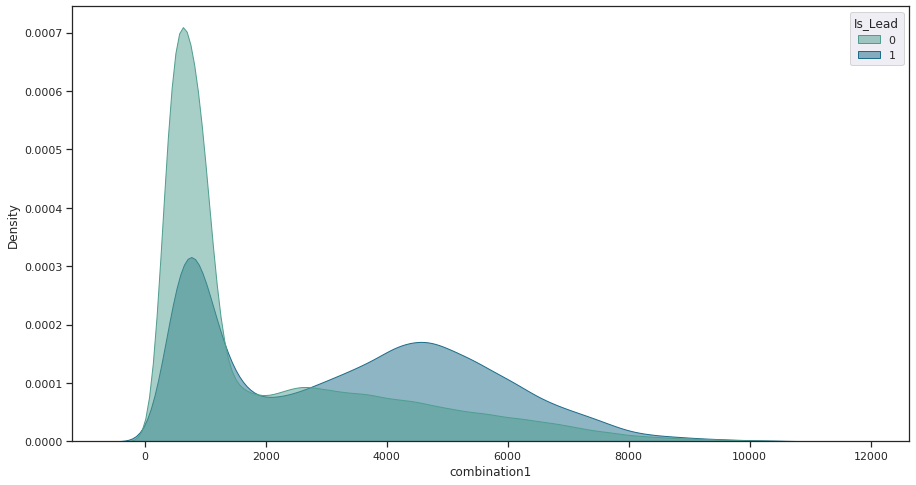

In [42]:
# plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train,
           x="combination1",
           hue="Is_Lead",
           fill=True,
           common_norm=False,
           palette="crest",
           alpha=.5,
           linewidth=1);

# Analysis on new Modified data

<Figure size 432x288 with 0 Axes>

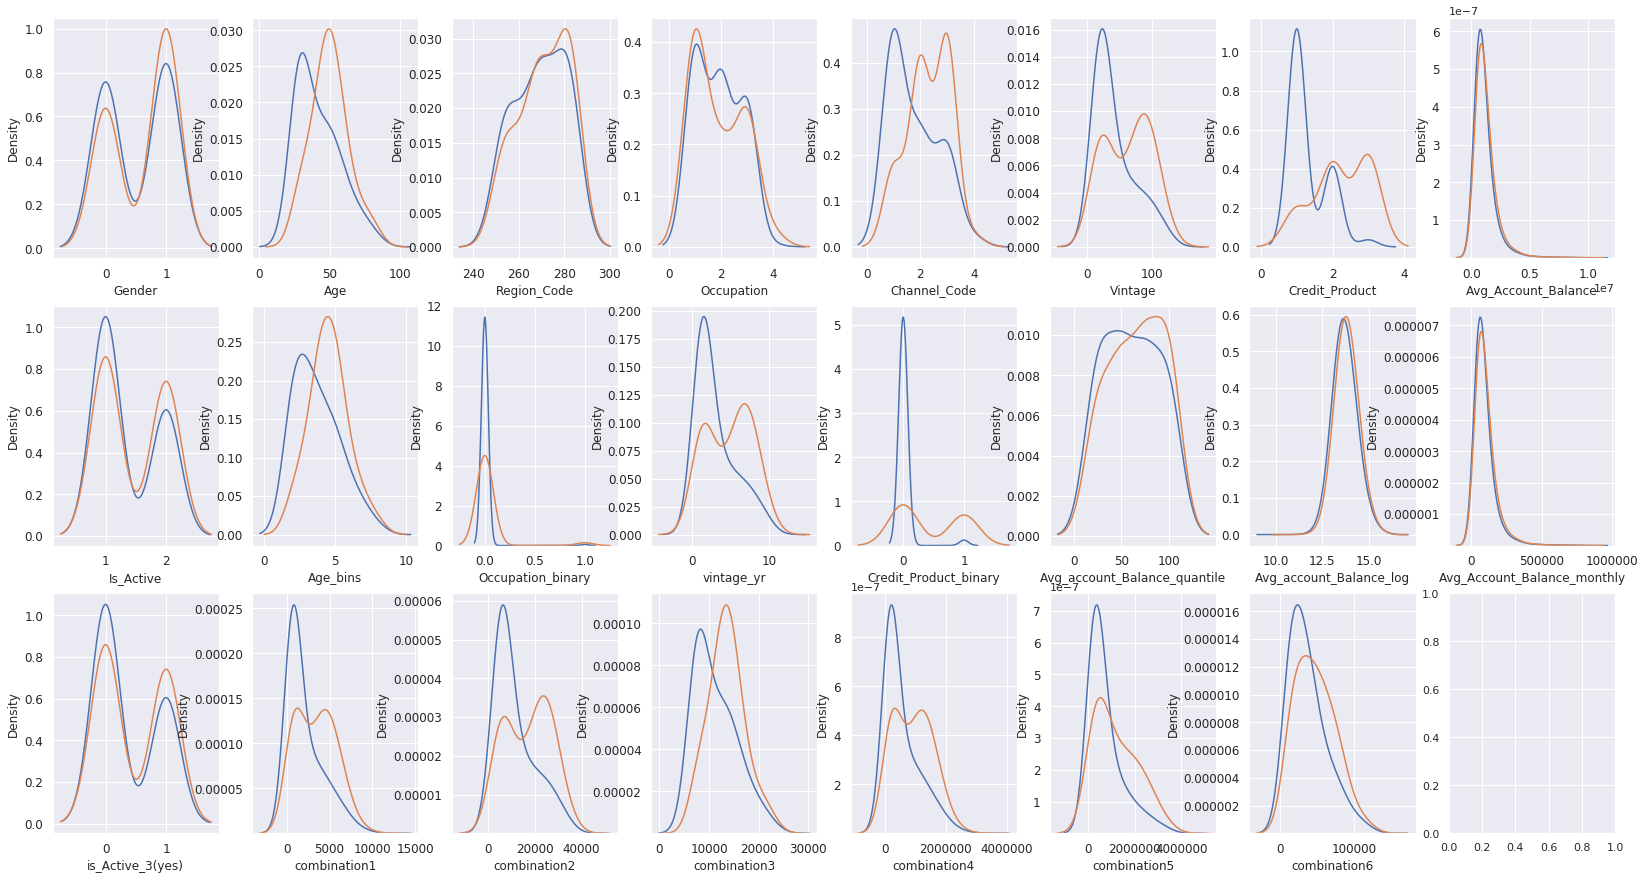

In [43]:
#Plotting the distributions of all the featuers

# Plotting numerical variable in displot to visualise the distribution

train_num=train.select_dtypes(include="number")
var=list(train_num.columns.values)
# dropping Class columns from the list
var.remove("Is_Lead")
i=0
t0=train.loc[train["Is_Lead"]==0]
t1=train.loc[train["Is_Lead"]==1]

plt.figure()
fig,ax=plt.subplots(3,8,figsize=(28,15))
for feature in var:
    i+=1
    plt.subplot(3,8,i)
    sns.kdeplot(t0[feature],bw=0.5,label="0")
    sns.kdeplot(t1[feature],bw=0.5,label="1")
    plt.xlabel(feature,fontsize=12)
    locs,labels=plt.xticks()
    plt.tick_params(axis="both",which="major",labelsize=12)
    
plt.show();

In [44]:
train.drop(['Avg_Account_Balance'], axis=1, inplace=True)

train.drop(['Avg_account_Balance_log'], axis=1, inplace=True)

train.drop(['Avg_Account_Balance_monthly'], axis=1, inplace=True)

# Transformation

In [45]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active', 'Is_Lead', 'Age_bins',
       'Occupation_binary', 'vintage_yr', 'Credit_Product_binary',
       'Avg_account_Balance_quantile', 'is_Active_3(yes)', 'combination1',
       'combination2', 'combination3', 'combination4', 'combination5',
       'combination6'],
      dtype='object')

In [46]:
std_scl=preprocessing.StandardScaler() #instance of preprocessing
cols=list(train.columns.values)
cols.remove("Is_Lead")
train_scl=pd.DataFrame(std_scl.fit_transform(train[cols]),columns=cols)
train_scl["Is_Lead"]=train["Is_Lead"]
train_scl["Is_Lead"].value_counts()
train_scl.head()

Gender       Age  Region_Code  Occupation  Channel_Code   Vintage  \
0 -1.096931  1.965365    -0.172389    1.292279      1.239925 -0.122373   
1 -1.096931 -0.934429     0.655830    0.120975     -1.020375 -0.462372   
2 -1.096931  0.818935    -0.172389   -1.050330      1.239925 -0.647825   
3  0.911634 -0.664680     0.011660    0.120975     -1.020375 -0.864188   
4 -1.096931 -0.934429     1.115951    0.120975     -1.020375 -0.431463   

   Credit_Product  Is_Active  Age_bins  Occupation_binary  ...  \
0       -0.761626  -0.796872  1.997546          -0.104751  ...   
1       -0.761626  -0.796872 -0.585475          -0.104751  ...   
2       -0.761626   1.254906  0.706035          -0.104751  ...   
3       -0.761626  -0.796872 -0.585475          -0.104751  ...   
4       -0.761626  -0.796872 -0.585475          -0.104751  ...   

   Credit_Product_binary  Avg_account_Balance_quantile  is_Active_3(yes)  \
0              -0.368121                      0.447247         -0.796872   
1              -0.368121                     -1.341604         -0.796872   
2              -0.368121                      1.341673          1.254906   
3              -0.368121                     -1.341604         -0.796872   
4              -0.368121                     -0.447178         -0.796872   

   combination1  combination2  combination3  combination4  combination5  \
0      0.364447     -0.134696      1.884795      0.346005      0.024771   
1     -0.657987     -0.435583     -0.866601     -0.644569     -0.793932   
2     -0.425253     -0.650050      0.770937     -0.430577     -0.188598   
3     -0.805322     -0.857955     -0.653902     -0.802109     -0.912845   
4     -0.643910     -0.385586     -0.829929     -0.621739     -0.483494   

   combination6  Is_Lead  
0      1.428893        0  
1     -1.155689        0  
2      1.573709        0  
3     -1.110740        0  
4     -0.740637        0  

[5 rows x 21 columns]

## check Skewness

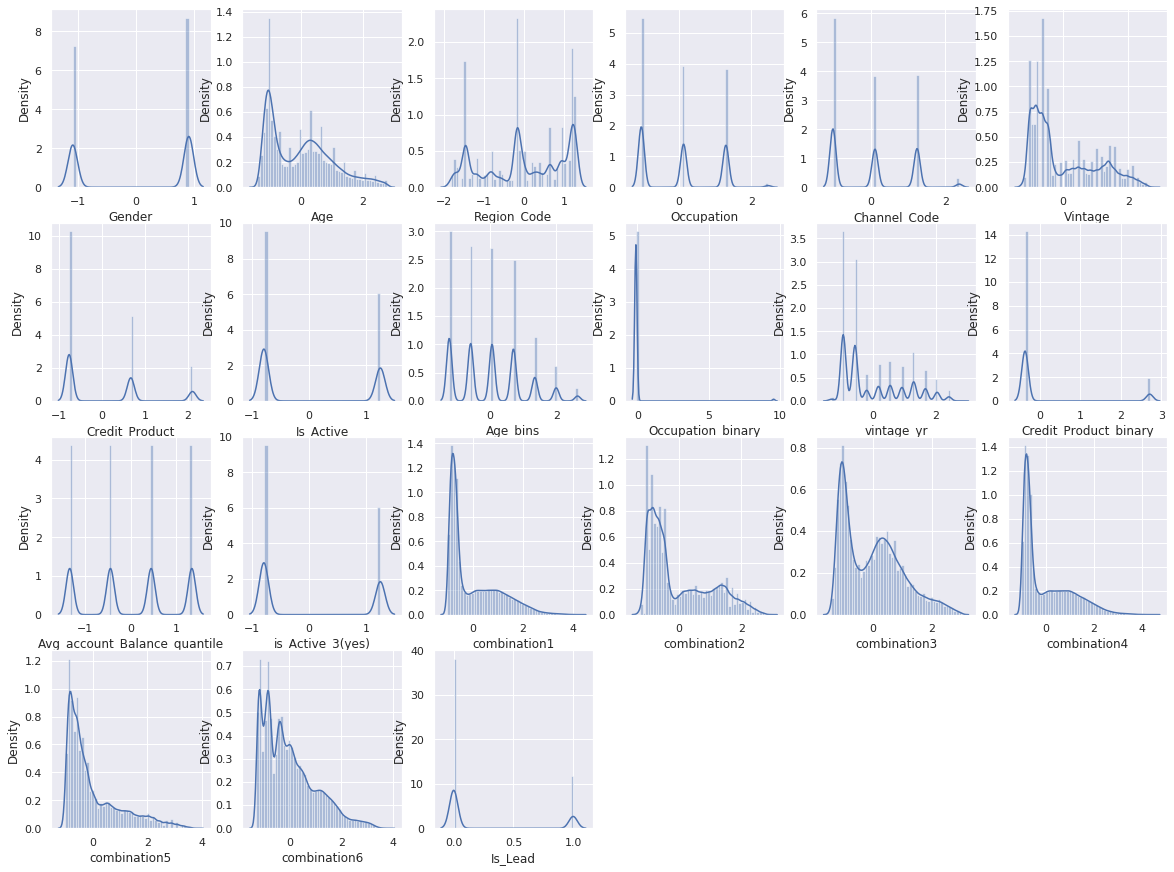

In [47]:
# plot the histogram of a variable from the dataset to see the skewness
var=train_scl.columns

plt.figure(figsize=(20,19))
i=0
for col in var:
    i+=1
    plt.subplot(5,6,i)
    sns.distplot(train_scl[col])
    
plt.show()

In [54]:
# Lets check the skewness of the features
var=train_scl.columns
skew_list=[]
for i in var:
    skew_list.append(train_scl[i].skew())
tmp=pd.concat([pd.DataFrame(var,columns=["Features"]),pd.DataFrame(skew_list,columns=["Skewness"])],axis=1) 
tmp.set_index("Features",inplace=True)

tmp.T

Features    Gender       Age  Region_Code  Occupation  Channel_Code   Vintage  \
Skewness -0.185298  0.618992     -0.26556    0.303374      0.386726  0.790189   

Features  Credit_Product  Is_Active  Age_bins  Occupation_binary  ...  \
Skewness        0.937704   0.458036  0.525495           9.441791  ...   

Features  Credit_Product_binary  Avg_account_Balance_quantile  \
Skewness               2.348393                      0.000071   

Features  is_Active_3(yes)  combination1  combination2  combination3  \
Skewness          0.458036      1.040296      0.803279      0.624767   

Features  combination4  combination5  combination6   Is_Lead  
Skewness      1.048691      1.346272      0.905815  1.235596  

[1 rows x 21 columns]

In [56]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed=tmp.loc[(tmp["Skewness"]>1) | (tmp["Skewness"]<-1)].index
print(skewed)

Index(['Occupation_binary', 'Credit_Product_binary', 'combination1',
       'combination4', 'combination5', 'Is_Lead'],
      dtype='object', name='Features')


In [57]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt=PowerTransformer(copy=False)
# Fitting the power transformer in train data
train_scl["Occupation_binary"]=pt.fit_transform(train_scl[["Occupation_binary"]])
train_scl["Occupation_binary"]=pt.transform(train_scl[["Occupation_binary"]])

train_scl['Credit_Product_binary'] = pt.fit_transform(train_scl[['Credit_Product_binary']])
train_scl['Credit_Product_binary'] = pt.transform(train_scl[['Credit_Product_binary']])

train_scl['combination1'] = pt.fit_transform(train_scl[['combination1']])
train_scl['combination1'] = pt.transform(train_scl[['combination1']])

train_scl['combination4'] = pt.fit_transform(train_scl[['combination4']])
train_scl['combination4'] = pt.transform(train_scl[['combination4']])

train_scl['combination5'] = pt.fit_transform(train_scl[['combination5']])
train_scl['combination5'] = pt.transform(train_scl[['combination5']])

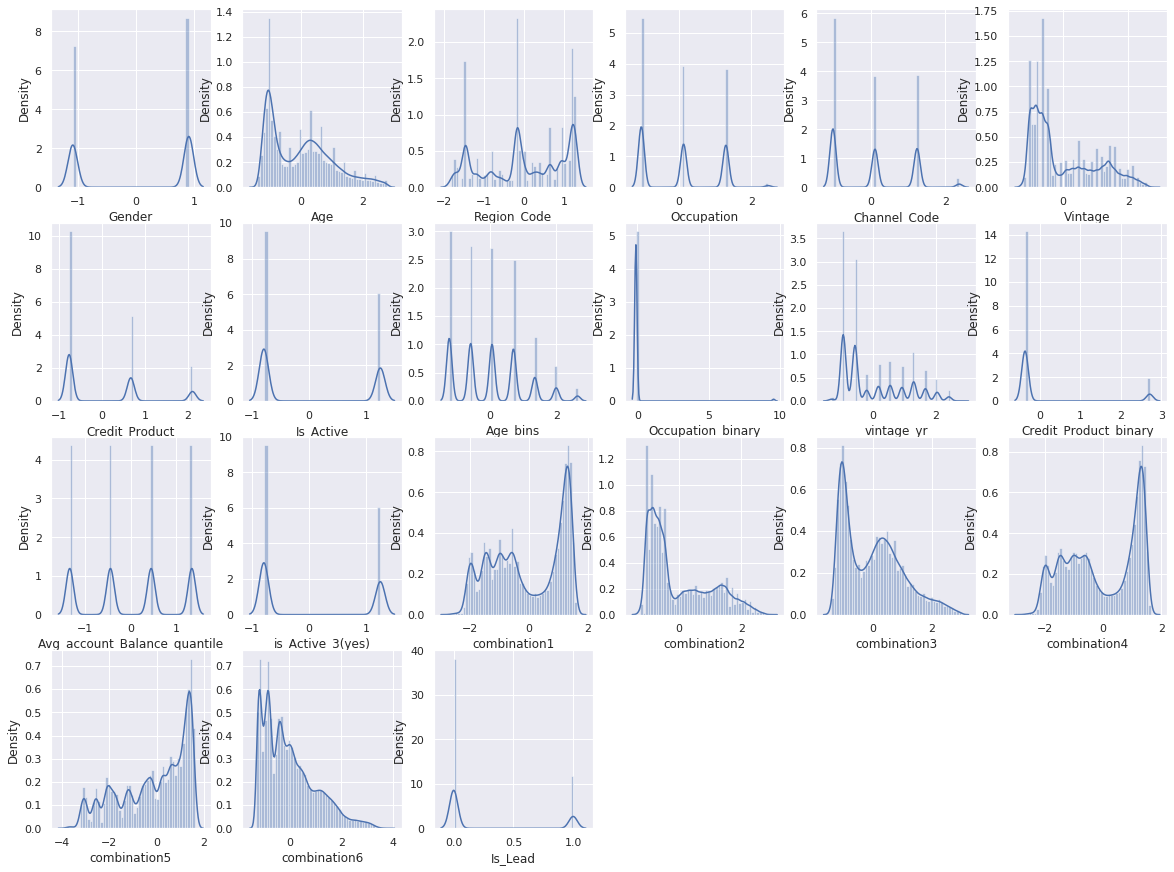

In [58]:
# plot the histogram of a variable from the dataset to see the skewness
var=train_scl.columns
plt.figure(figsize=(20,19))
i=0
for col in var:
    i+=1
    plt.subplot(5,6,i)
    sns.distplot(train_scl[col])
    
plt.show()

## Class analysis

In [59]:
classes=train_scl["Is_Lead"].value_counts()
islead_0=round(classes[0]/train_scl["Is_Lead"].count()*100,2)
islead_1=round(classes[1]/train_scl["Is_Lead"].count()*100,2)
islead_0,islead_1

(76.28, 23.72)

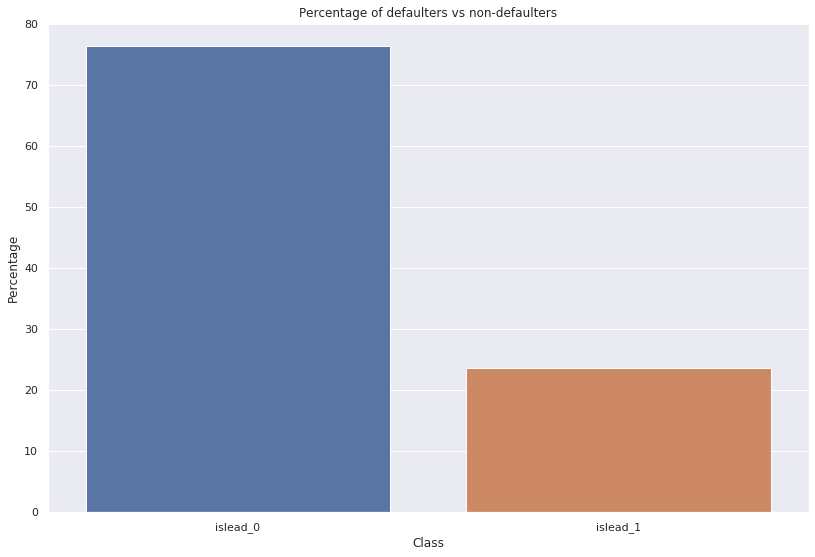

In [60]:
# Create a bar plot for the number and percentage of islead_0 vs islead_1
plt.figure(figsize=(30,9))
plt.subplot(1,2,2)
islead_percentage={"Class":["islead_0","islead_1"],"Percentage":[islead_0,islead_1]}
df_islead_percentage=pd.DataFrame(islead_percentage)
sns.barplot(x="Class",y="Percentage",data=df_islead_percentage)
plt.title('Percentage of defaulters vs non-defaulters')

plt.show()

# Test Data Processing

In [62]:
test_raw     = pd.read_csv('test_mSzZ8RL.csv')
#Data encoding
test_raw['Gender']               = test_raw['Gender'].replace({'Female':0,'Male':1})
test_raw["Occupation"]           = test_raw["Occupation"].replace({"Self_Employed":1,"Salaried":2,"Other":3,"Entrepreneur":4})
test_raw["Channel_Code"]         = test_raw["Channel_Code"].replace({'X1':'1','X2':'2','X3':'3','X4':'4'})
test_raw["Credit_Product"]       = test_raw["Credit_Product"].replace({'No':'1','Yes':'2'})
test_raw["Is_Active"]            = test_raw["Is_Active"].replace({'No':'1','Yes':'2'})
test_raw["Region_Code"]          = test_raw["Region_Code"].apply(lambda x:x[2:])


test_raw["Credit_Product"] = test_raw["Credit_Product"].fillna(3)

test_raw["Region_Code"]      = pd.to_numeric(test_raw["Region_Code"])
test_raw["Channel_Code"]     = pd.to_numeric(test_raw["Channel_Code"])
test_raw["Credit_Product"]   = pd.to_numeric(test_raw["Credit_Product"])
test_raw["Is_Active"]        = pd.to_numeric(test_raw["Is_Active"])

test_raw['Age_bins'] = np.array(np.floor(np.array(test_raw['Age']) / 10.))

occupation_binary = np.array(test_raw['Occupation'])
test_raw['Occupation_binary'] = test_raw['Occupation'].map(lambda x: 1 if x == 4 else 0)

test_raw['vintage_yr'] = np.array(np.floor(np.array(test_raw['Vintage']) / 12.))

Credit_Product_binary = np.array(test_raw['Credit_Product'])
test_raw['Credit_Product_binary'] = test_raw['Credit_Product'].map(lambda x: 1 if x == 3 else 0)

quantiles_range = [0, .25, .5, .75, 1.]
quantiles = test_raw['Avg_Account_Balance'].quantile(quantiles_range)
quantile_labels = ['25', '50', '75', '100']
test_raw['Avg_Account_Balance_quantile'] = pd.qcut(test_raw['Avg_Account_Balance'], q=quantiles_range, labels=quantile_labels)
test_raw['Avg_Account_Balance_quantile'] = pd.to_numeric(test_raw["Avg_Account_Balance_quantile"])

test_raw['Avg_Account_Balance_log'] = np.log((1 + test_raw['Avg_Account_Balance']))

test_raw['Avg_Account_Balance_monthly'] = np.array(np.floor(np.array(test_raw['Avg_Account_Balance']) / 12.))

is_Active = np.array(test_raw['Is_Active'])
test_raw['is_Active_3(yes)'] = test_raw['Is_Active'].map(lambda x: 3 if x == 2 else 0)

test_raw['combination1']   = test_raw['Age']  * test_raw['Vintage']
test_raw['combination2']   = test_raw['Vintage']  * test_raw['Region_Code'] 
test_raw['combination3']   = test_raw['Region_Code'] * test_raw['Age']
test_raw['combination4']   = test_raw['Age']  * test_raw['Vintage'] * test_raw['Region_Code']
test_raw['combination5']   = test_raw['Vintage']  * test_raw['Region_Code'] * test_raw['Avg_Account_Balance_quantile'] 
test_raw['combination6']   = test_raw['Avg_Account_Balance_quantile'] * test_raw['Age']  * test_raw['Avg_Account_Balance_log']

test_raw.drop(['ID'], axis = 1, inplace=True)
test_raw.drop(['Avg_Account_Balance'], axis = 1, inplace=True)
test_raw.drop(['Avg_Account_Balance_log'], axis=1, inplace=True)
test_raw.drop(['Avg_Account_Balance_monthly'], axis=1, inplace=True)

std_scl = preprocessing.StandardScaler() #instance of preprocessing
cols = test_raw.columns.values
test_scl = pd.DataFrame(std_scl.fit_transform(test_raw[cols]), columns = cols)

# Lets check the skewness of the features
var = test_scl.columns
skew_list = []
for i in var:
    skew_list.append(test_scl[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)

# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
for i in skewed:
  # preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
  pt = PowerTransformer(copy=False)
  # Fitting the power transformer in train data
  test_scl[i] = pt.fit_transform(test_scl[[i]])
test_scl

Gender       Age  Region_Code  Occupation  Channel_Code   Vintage  \
0       0.908299 -0.999878    -1.451764    1.294862     -1.019283 -0.676804   
1       0.908299 -0.058563    -0.167798    1.294862      0.112272  0.066841   
2       0.908299 -0.865404     0.015626    0.121541     -1.019283 -1.017641   
3       0.908299 -0.999878     0.199050    1.294862     -1.019283 -0.428922   
4      -1.100959 -0.999878     0.015626    1.294862     -1.019283 -0.862715   
...          ...       ...          ...         ...           ...       ...   
105307  0.908299  0.546567    -0.167798    0.121541      0.112272  1.213293   
105308  0.908299  0.748278     0.657609    1.294862      0.112272  1.213293   
105309  0.908299 -0.596457    -1.451764    0.121541      2.375382 -0.986656   
105310  0.908299  0.613804    -1.451764    1.294862      1.243827  1.430189   
105311  0.908299 -1.134351    -1.268341    0.121541     -1.019283 -0.800745   

        Credit_Product  Is_Active  Age_bins  Occupation_binary  vintage_yr  \
0             0.668140  -0.806682 -1.227360          -0.101601   -0.557444   
1             2.101608  -0.806682  0.059855          -0.101601    0.188648   
2            -0.765327  -0.806682 -0.583752          -0.101601   -0.930490   
3            -0.765327  -0.806682 -1.227360          -0.101601   -0.557444   
4            -0.765327  -0.806682 -1.227360          -0.101601   -0.930490   
...                ...        ...       ...                ...         ...   
105307        0.668140   1.239646  0.703463          -0.101601    1.307787   
105308        0.668140  -0.806682  0.703463          -0.101601    1.307787   
105309       -0.765327  -0.806682 -0.583752          -0.101601   -0.930490   
105310       -0.765327   1.239646  0.703463          -0.101601    1.307787   
105311       -0.765327  -0.806682 -1.227360          -0.101601   -0.930490   

        Credit_Product_binary  Avg_Account_Balance_quantile  is_Active_3(yes)  \
0                   -0.367355                     -0.447214         -0.806682   
1                    2.722161                      0.447214         -0.806682   
2                   -0.367355                     -1.341641         -0.806682   
3                   -0.367355                     -0.447214         -0.806682   
4                   -0.367355                     -0.447214         -0.806682   
...                       ...                           ...               ...   
105307              -0.367355                      1.341641          1.239646   
105308              -0.367355                      0.447214         -0.806682   
105309              -0.367355                      1.341641         -0.806682   
105310              -0.367355                     -0.447214          1.239646   
105311              -0.367355                     -1.341641         -0.806682   

        combination1  combination2  combination3  combination4  combination5  \
0          -0.850543     -0.717857     -1.094687     -0.890025     -0.718565   
1           0.271557      0.051070     -0.081181      0.259745      0.651221   
2          -1.159932     -1.009238     -0.849964     -1.153544     -1.447281   
3          -0.622351     -0.420127     -0.967451     -0.612920     -0.355746   
4          -1.032426     -0.856178     -0.981588     -1.026919     -0.903657   
...              ...           ...           ...           ...           ...   
105307      1.171673      1.175323      0.506741      1.157965      1.570821   
105308      1.233526      1.263078      0.823370      1.255675      1.320043   
105309     -1.060398     -1.005837     -0.723215     -1.088209     -0.537080   
105310      1.278580      1.240402      0.391204      1.206018      0.868849   
105311     -1.015316     -0.828287     -1.205349     -1.041210     -1.306289   

        combination6  
0          -0.778098  
1           0.191249  
2          -1.173659  
3          -0.769198  
4          -0.785041  
...              ...  
105307      1.566507  
105308

# Model Building